# Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load the cleaned dataset
cleaned_df = pd.read_excel("Clean_data.xlsx")

# Handle categorical variables using one-hot encoding
categorical_columns = ['DAY_OF_WEEK', 'LIGHT_CONDITION', 'SURFACE_COND', 'ATMOSPH_COND', 'LGA_NAME']
one_hot = OneHotEncoder(drop='first', sparse=False)
encoded_features = one_hot.fit_transform(cleaned_df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot.get_feature_names(categorical_columns))
cleaned_df = cleaned_df.drop(columns=categorical_columns)
cleaned_df = pd.concat([cleaned_df, encoded_df], axis=1)

# Split the dataset into training and test sets
X = cleaned_df.drop('SEVERITY', axis=1)
y = cleaned_df['SEVERITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the data
cleaned_df = pd.read_excel("Clean_data.xlsx")

# Separate target from predictors
y = cleaned_df['SEVERITY']
X = cleaned_df.drop('SEVERITY', axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding for categorical columns
categorical_columns = ["DAY_OF_WEEK", "LIGHT_CONDITION", "SURFACE_COND", "ATMOSPH_COND", "LGA_NAME"]
one_hot = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = one_hot.fit_transform(X_train[categorical_columns])
X_test_encoded = one_hot.transform(X_test[categorical_columns])

# Construct DataFrames with one-hot encoded features
feature_names = one_hot.get_feature_names(input_features=categorical_columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

# Drop original categorical columns and concatenate the one-hot encoded ones
X_train = pd.concat([X_train.drop(columns=categorical_columns), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_columns), X_test_encoded_df], axis=1)

# Initialize the model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), use_label_encoder=False, eval_metric='mlogloss')

# Subtract 1 from target labels to make them start from 0
y_train_shifted = y_train - 1
y_test_shifted = y_test - 1

# Train the model
xgb_model.fit(X_train, y_train_shifted)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Adding 1 to bring predictions to the original scale
y_pred_original_scale = y_pred + 1

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_original_scale)
print(f"Accuracy: {accuracy:.4f}")

# Neural Network

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_excel("Clean_data.xlsx")

# Categorical columns
categorical_columns = ['HOUR','DAY_OF_WEEK', 'LIGHT_CONDITION','SPEED_ZONE','SURFACE_COND', 'ATMOSPH_COND', 'LGA_NAME']

# One-hot encode categorical columns
one_hot = OneHotEncoder(drop='first', sparse=False)
encoded_features = one_hot.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot.get_feature_names(categorical_columns))

# Combine data
data = pd.concat([data, encoded_df], axis=1)
data = data.drop(columns=categorical_columns)

# Splitting the data into train and test sets
X = data.drop('SEVERITY', axis=1)
y = data['SEVERITY'] - 1  # Adjust labels to be from 0 to 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')  # 5 classes (0 to 4)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate its performance on the test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

Epoch 1/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.7095 - accuracy: 0.6458 - val_loss: 0.6999 - val_accuracy: 0.6498
Epoch 2/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.6930 - accuracy: 0.6524 - val_loss: 0.6996 - val_accuracy: 0.6491
Epoch 3/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.6891 - accuracy: 0.6522 - val_loss: 0.7010 - val_accuracy: 0.6491
Epoch 4/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.6856 - accuracy: 0.6543 - val_loss: 0.6978 - val_accuracy: 0.6506
Epoch 5/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.6821 - accuracy: 0.6561 - val_loss: 0.6994 - val_accuracy: 0.6500
Epoch 6/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.6784 - accuracy: 0.6574 - val_loss: 0.7015 - val_accuracy: 0.6458
Epoch 7/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.6740 - accuracy: 0.6598 - val_loss: 0.7031 - val_ac

2283/2283 [==============================] - 3s 2ms/step - loss: 0.5687 - accuracy: 0.7197 - val_loss: 0.8691 - val_accuracy: 0.6253
Epoch 58/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.5675 - accuracy: 0.7201 - val_loss: 0.8776 - val_accuracy: 0.6254
Epoch 59/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.5669 - accuracy: 0.7200 - val_loss: 0.8812 - val_accuracy: 0.6267
Epoch 60/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.5655 - accuracy: 0.7215 - val_loss: 0.8972 - val_accuracy: 0.6160
Epoch 61/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.5651 - accuracy: 0.7216 - val_loss: 0.8811 - val_accuracy: 0.6200
Epoch 62/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.5650 - accuracy: 0.7223 - val_loss: 0.8889 - val_accuracy: 0.6228
Epoch 63/100
2283/2283 [==============================] - 3s 1ms/step - loss: 0.5634 - accuracy: 0.7222 - val_loss: 0.8910 - val_accuracy

# Visualise Results

1427/1427 [==============================] - 1s 635us/step


C:\Users\buida\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\buida\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\buida\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


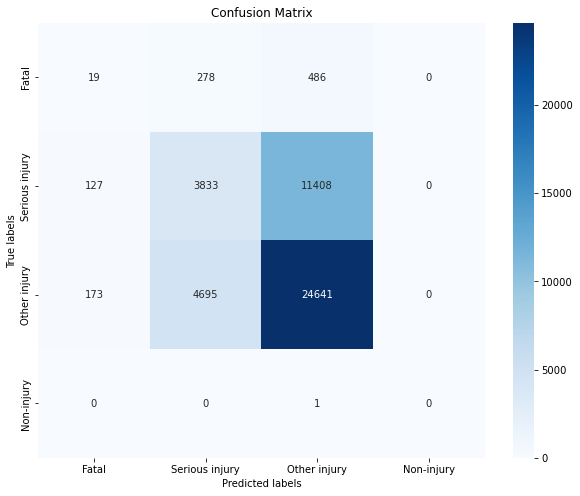

              precision    recall  f1-score       support
0              0.059561  0.024266  0.034483    783.000000
1              0.435271  0.249414  0.317118  15368.000000
2              0.674431  0.835033  0.746188  29509.000000
3              0.000000  0.000000  0.000000      1.000000
accuracy       0.624012  0.624012  0.624012      0.624012
macro avg      0.292316  0.277178  0.274447  45661.000000
weighted avg   0.583379  0.624012  0.589556  45661.000000


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the model is already trained
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Calculate classification report which contains precision, recall, and F1-score
report = classification_report(y_test, y_pred_classes, output_dict=True)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fatal', 'Serious injury', 'Other injury', 'Non-injury'], yticklabels=['Fatal', 'Serious injury', 'Other injury', 'Non-injury'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Convert report to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()
print(report_df)

1427/1427 [==============================] - 1s 621us/step


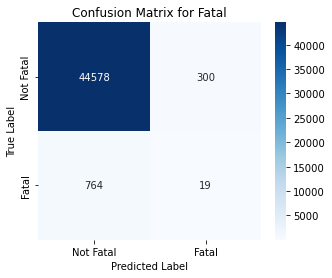

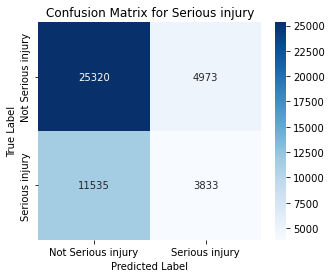

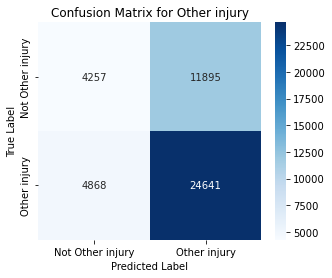

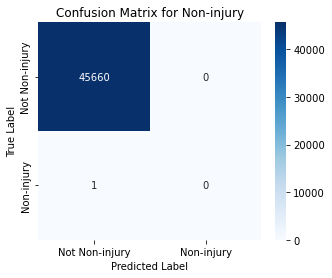

In [16]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_classes = np.argmax(model.predict(X_test_scaled), axis=1)

# Generate multilabel confusion matrices
mcm = multilabel_confusion_matrix(y_test, y_pred_classes)

# Define class names
classes = ['Fatal', 'Serious injury', 'Other injury', 'Non-injury']

# Plot each matrix
for matrix, label in zip(mcm, classes):
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Not ' + label, label], 
                yticklabels=['Not ' + label, label])
    plt.title('Confusion Matrix for ' + label)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()